<a href="https://colab.research.google.com/github/Zaedul-Islam/Introduction_to_Data_Visualization_in_Python/blob/master/3.%20Statistical%20plots%20with%20Seaborn/Statistical%20plots%20with%20Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Data Visualization in Python**

### **3. Statistical plots with Seaborn**


### **Exercise: Simple linear regressions**

As you have seen, seaborn provides a convenient interface to generate complex and great-looking statistical plots. One of the simplest things you can do using seaborn is to fit and visualize a simple linear regression between two variables using sns.lmplot().

One difference between seaborn and regular matplotlib plotting is that you can pass pandas DataFrames directly to the plot and refer to each column by name. For example, if you were to plot the column '`price`' vs the column '`area`' from a DataFrame df, you could call `sns.lmplot(x='area', y='price', data=df)`.

In this exercise, you will once again use the DataFrame auto containing the auto-mpg dataset. You will plot a linear regression illustrating the relationship between automobile weight and horse power.




In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Reading the dataset
filepath = '/content/drive/My Drive/Colab Notebooks/DataCamp/Introduction to Data Visualization in Python/2. Plotting 2D arrays/Dataset/auto-mpg.csv'
dataset = pd.read_csv(filepath)

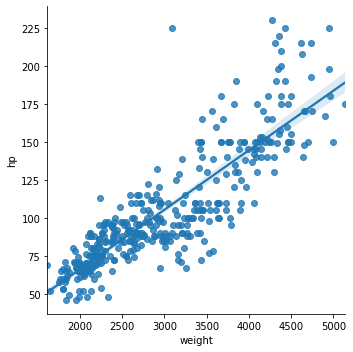

In [3]:
# Plot a linear regression between 'weight' and 'hp'
sns.lmplot(x = 'weight', y ='hp', data =dataset)

# Display the plot
plt.show()

**Findings:**
1. Unsurprisingly, there is a strong correlation between '`hp`' and '`weight`', and a linear regression is easily able to capture this trend.

### **Exercise: Plotting residuals of a regression**

Often, you don't just want to see the regression itself but also see the residuals to get a better idea how well the regression captured the data. Seaborn provides `sns.residplot()` for that purpose, visualizing how far datapoints diverge from the regression line.

In this exercise, you will visualize the residuals of a regression between the '`hp`' column (horse power) and the '`mpg`' column (miles per gallon) of the `auto` DataFrame used previously.

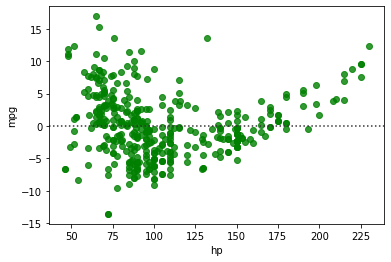

In [4]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a green residual plot of the regression between 'hp' and 'mpg'
sns.residplot(x= 'hp', y = 'mpg', data = dataset, color ='green')

# Display the plot
plt.show()


### **Exercise: Higher-order regressions**

When there are more complex relationships between two variables, a simple first order regression is often not sufficient to accurately capture the relationship between the variables. Seaborn makes it simple to compute and visualize regressions of varying orders.

Here, you will plot a second order regression between the horse power ('`hp`') and miles per gallon ('`mpg`') using `sns.regplot()` (the function sns.lmplot() is a higher-level interface to sns.regplot()). However, before plotting this relationship, compare how the residual changes depending on the order of the regression. Does a second order regression perform significantly better than a simple linear regression?

A principal difference between `sns.lmplot()` and `sns.regplot()` is the way in which matplotlib options are passed (`sns.regplot()` is more permissive).
For both `sns.lmplot()` and `sns.regplot()`, the keyword order is used to control the order of polynomial regression.
The function `sns.regplot()` uses the argument `scatter=None` to prevent plotting the scatter plot points again.




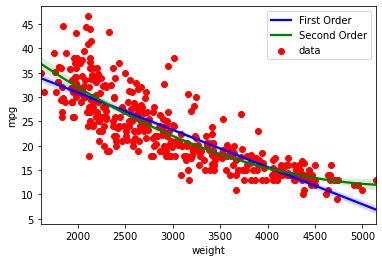

In [5]:
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(dataset['weight'], dataset['mpg'], label='data', color='red', marker='o')

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=dataset, scatter=None, color='blue', label='First Order')

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=dataset, scatter=None, color='green', order= 2, label='Second Order')

# Add a legend and display the plot
plt.legend(loc = 'upper right')
plt.show()


**Findings:**
1. It seems like a regression of order 2 is necessary to properly capture the relationship between '`weight`' and '`mpg`'

### **Exercise: Grouping linear regressions by hue**

Often it is useful to compare and contrast trends between different groups. Seaborn makes it possible to apply linear regressions separately for subsets of the data by applying a groupby operation. Using the `hue` argument, you can specify a categorical variable by which to group data observations. The distinct groups of points are used to produce distinct regressions with different hues in the plot.

In the automobile dataset - which has been pre-loaded here as auto - you can view the relationship between weight ('`weight`') and horsepower ('`hp`') of the cars and group them by their origin ('`origin`'), giving you a quick visual indication how the relationship differs by continent.

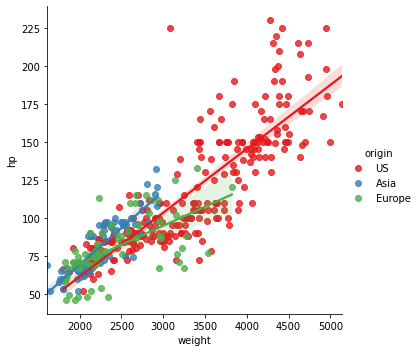

In [6]:
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot(x = 'weight', y = 'hp', data = dataset, hue = 'origin', palette = 'Set1')

# Display the plot
plt.show()


**Findings:**
1. It looks like US automobiles tend to have higher hp

### **Exercise: Grouping linear regressions by row or column**

Rather than overlaying linear regressions of grouped data in the same plot, we may want to use a grid of subplots. The `sns.lmplot()` accepts the arguments `row` and/or `col` to arrangements of subplots for regressions.

You'll use the automobile dataset again and, this time, you'll use the keyword argument `row` to display the subplots organized in rows. That is, you'll produce horsepower vs. weight regressions grouped by continent of origin in separate subplots stacked vertically.

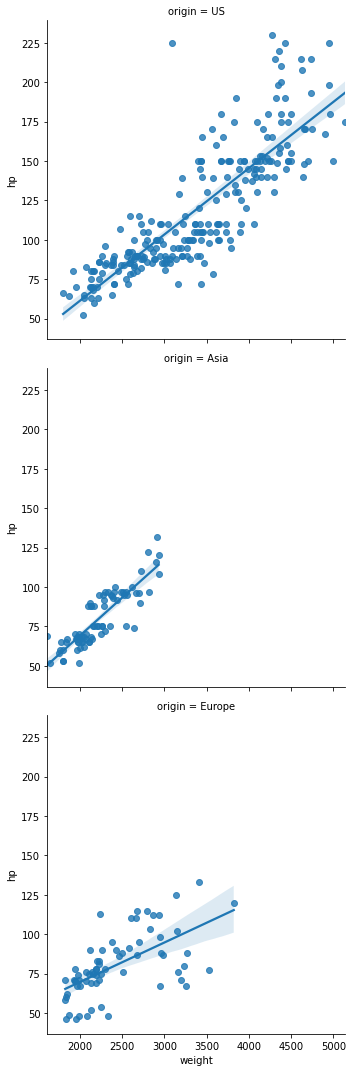

In [7]:
# Plot linear regressions between 'weight' and 'hp' grouped row-wise by 'origin'
sns.lmplot(x = 'weight', y = 'hp', data = dataset, row = 'origin')

# Display the plot
plt.show()


**Findings:**
1.  It is easier to make sense of the three regression lines now that they each have their own subplot

### **Exercise: Constructing strip plots**

Regressions are useful to understand relationships between two continuous variables. Often we want to explore how the distribution of a single continuous variable is affected by a second categorical variable. Seaborn provides a variety of plot types to perform these types of comparisons between univariate distributions.

The strip plot is one way of visualizing this kind of data. It plots the distribution of variables for each category as individual datapoints. For vertical strip plots (the default), distributions of continuous values are laid out parallel to the y-axis and the distinct categories are spaced out along the x-axis.

For example, `sns.stripplot(x='type', y='length', data=df)` produces a sequence of vertical strip plots of `length` distributions grouped by `type` (assuming length is a continuous column and type is a categorical column of the DataFrame df).
Overlapping points can be difficult to distinguish in strip plots. The argument `jitter=True` helps spread out overlapping points.
Other matplotlib arguments can be passed to `sns.stripplot()`, e.g., `marker`, `color`, `size`, etc.

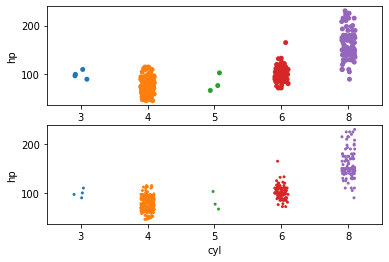

In [8]:
# Make a strip plot of 'hp' grouped by 'cyl'
plt.subplot(2,1,1)
sns.stripplot(x= dataset['cyl'], y = dataset['hp'], data = dataset)

# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.stripplot(x = dataset['cyl'], y = dataset['hp'], data = dataset, jitter = True, size = 3)

# Display the plot
plt.show()


**Findings:**
1. Here, '`hp`' is the continuous variable, and '`cyl`' is the categorical variable. The strip plot shows that automobiles with more cylinders tend to have higher horsepower